# Mengestimasi nilai a dan b value pada data katalog

Jalankan file ini di Openquake yang sudah diinstal di komputer masing-masing.

atau:

Jalankan file ini di jupyter dengan cara mengubah kernel ke `openquake`. Jika kernel `openquake` belum ada, lakukan langkah-langkah berikut ini:

Openquake dapat diunduh di sini:
https://downloads.openquake.org/pkgs/windows/oq-engine/OpenQuake_Engine_3.11.5-1.exe

Install beberapa tambahan packages di openquake:

(Asumsi lokasi instalasi openquake di sini: `C:\Program Files\Openquake Engine\python3.6\`, 
jika tidak maka ubah lokasi tersebut sesuai dengan komputer masing-masing)

1. Buka Command Prompt
2. Install `utm`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install utm`
3. Install `jupyter`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install jupyter`
4. Daftarkan ke dalam kernel (opsional): `python -m ipykernel install --name "openquake" --display-name "openquake"`


Untuk uji coba, jalankan salah satu baris di bawah ini:

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter.exe" notebook`

atau

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter-notebook.exe"`

## 1. Import packages

Hal ini memastikan apakah python yang digunakan sudah menyediakan packages yang dibutuhkan.

In [1]:
from openquake.hmtk.parsers.catalogue import *
from openquake.hmtk.plotting.seismicity.catalogue_plots import *
from openquake.hmtk.seismicity.declusterer.dec_gardner_knopoff import *
from openquake.hmtk.seismicity.declusterer.distance_time_windows import *
from openquake.hmtk.seismicity.selector import *
from openquake.hazardlib.geo.polygon import Polygon as PolyOQ
from openquake.hazardlib.geo.point import Point as PointOQ
from openquake.hazardlib.geo.line import Line as LineOQ
from openquake.hmtk.seismicity.completeness.comp_stepp_1971 import Stepp1971
from openquake.hmtk.seismicity.occurrence.b_maximum_likelihood import BMaxLikelihood
from openquake.hmtk.plotting.seismicity.completeness.plot_stepp_1972 import create_stepp_plot
from openquake.hmtk.seismicity.smoothing.smoothed_seismicity import SmoothedSeismicity
from openquake.hmtk.seismicity.smoothing.kernels.isotropic_gaussian import IsotropicGaussian
from openquake.hazardlib.geo.surface.complex_fault import ComplexFaultSurface
from shapely.geometry import *
from shapely.ops import *
import os
import utm
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pickle
from custom_openquake import *

## 2. Tambahan

### 2.2 Variabel

In [2]:
# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 3. Katalog gempa

In [3]:
# membuka data pkl
(catalogue_sumatera_fault_filt_2, 
 catalogue_mentawai_fault_filt_2, 
 catalogue_megathrust_1, 
 catalogue_megathrust_2, 
 catalogue_shallow_background_1_filt_4, 
 catalogue_deep_background_1_1_filt_2, 
 catalogue_deep_background_1_2_filt_3, 
 catalogue_deep_background_1_3_filt_3) = open_pkl("tmp_OQ006_catalogues_filtered.pkl")

## 4. Menghitung Mc

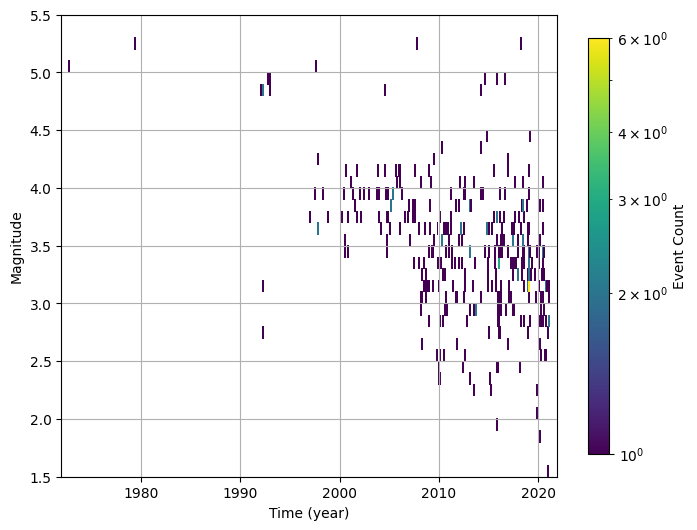

In [4]:
magnitude_bin_width = 0.1
time_bin_width = 0.1
plot_magnitude_time_density (catalogue_sumatera_fault_filt_2, magnitude_bin_width, time_bin_width)

In [5]:
comp_config = {'magnitude_bin': 0.1,
                'time_bin': 5. ,
                'increment_lock': True }

completeness_table, completeness_table_old = magnitude_of_completeness(catalogue_sumatera_fault_filt_2, 
                                                                        comp_config, mag_range=[2.5, 4.])

print("== Keseluruhan Mc ==")
print(completeness_table_old)
print("\n== selected Mc ==")
print(completeness_table)

== Keseluruhan Mc ==
[[2.016e+03 1.400e+00]
 [2.016e+03 1.500e+00]
 [2.016e+03 1.600e+00]
 [2.016e+03 1.700e+00]
 [2.011e+03 1.800e+00]
 [2.011e+03 1.900e+00]
 [2.011e+03 2.000e+00]
 [2.008e+03 2.100e+00]
 [2.003e+03 2.200e+00]
 [2.003e+03 2.300e+00]
 [2.003e+03 2.400e+00]
 [2.003e+03 2.500e+00]
 [2.003e+03 2.600e+00]
 [2.003e+03 2.700e+00]
 [2.003e+03 2.800e+00]
 [2.003e+03 2.900e+00]
 [2.003e+03 3.000e+00]
 [2.003e+03 3.100e+00]
 [2.003e+03 3.200e+00]
 [2.003e+03 3.300e+00]
 [2.003e+03 3.400e+00]
 [2.003e+03 3.500e+00]
 [2.003e+03 3.600e+00]
 [1.999e+03 3.700e+00]
 [1.997e+03 3.800e+00]
 [1.991e+03 3.900e+00]
 [1.991e+03 4.000e+00]
 [1.984e+03 4.100e+00]
 [1.984e+03 4.200e+00]
 [1.984e+03 4.300e+00]
 [1.984e+03 4.400e+00]
 [1.984e+03 4.500e+00]
 [1.984e+03 4.600e+00]
 [1.984e+03 4.700e+00]
 [1.974e+03 4.800e+00]
 [1.974e+03 4.900e+00]
 [1.974e+03 5.000e+00]
 [1.974e+03 5.100e+00]
 [1.974e+03 5.200e+00]
 [1.974e+03 5.300e+00]
 [1.974e+03 5.400e+00]]

== selected Mc ==
[[1999.     3.7]

In [6]:
mle_config = {'magnitude_interval': 0.1 ,
              'Average Type': 'Weighted',
              'reference_magnitude': None }
b_val, sigma_b, a_val, sigma_a = b_a_value(catalogue_sumatera_fault_filt_2, mle_config, completeness_table)

print("\n== a dan b value ==")
print("b value = ", b_val, 
      "sigma_b = ", sigma_b, 
      "a value = ", a_val, 
      "sigma_a = ", sigma_a)

-+- ctime 1999.0  m_c 3.7000000000000024
bval:  1.4085226440105445 sigma_b:  0.15583745183976463 neqi:  96 aval:  5.832077179860994 sigma_a:  0.5765985718071303
-+- ctime 1997.0  m_c 3.8000000000000025
bval:  1.3975260313790974 sigma_b:  0.17022154740412632 neqi:  79 aval:  5.810286001858977 sigma_a:  0.646841880135681
-+- ctime 1991.0  m_c 3.9000000000000026
bval:  1.2354929226558002 sigma_b:  0.1646110108277412 neqi:  66 aval:  5.14660464006522 sigma_a:  0.6419829422281911
-+- ctime 1984.0  m_c 4.100000000000003
bval:  0.946539255430169 sigma_b:  0.14661778360320604 neqi:  34 aval:  3.8325062676891415 sigma_a:  0.6011329127731457
-+- ctime 1974.0  m_c 4.800000000000003
bval:  2.105670215288503 sigma_b:  0.48398977043367547 neqi:  16 aval:  9.630095778665158 sigma_a:  2.3231508980816447

== a dan b value ==
b value =  1.3506471523315655 sigma_b =  0.17869781891966363 a value =  6.044927254868781 sigma_a =  0.666067195616912


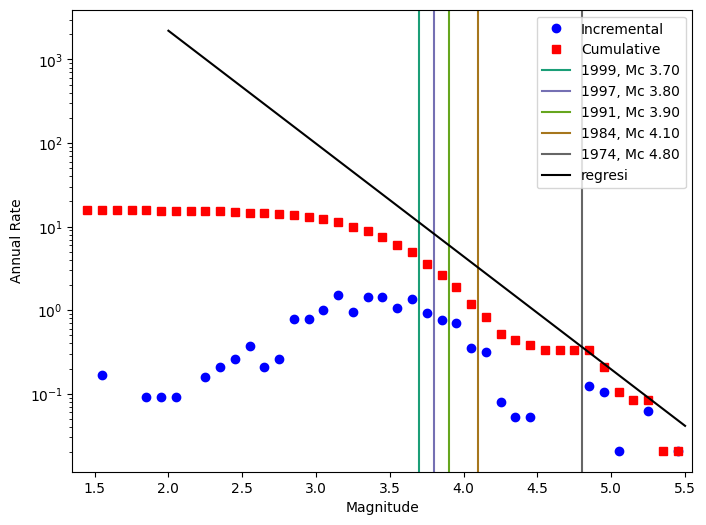

In [7]:
magnitude_bin_width = 0.1
m_range = [2., 5.5]
plot_observed_reccurence_with_Mc(catalogue_sumatera_fault_filt_2, completeness_table, completeness_table_old, 
                                 magnitude_bin_width, cmap_Mc='Dark2')
plt.plot(m_range, [10**(a_val-b_val*m_range[0]), 10**(a_val-b_val*m_range[1])], c='black', label="regresi")
plt.legend()